# Density Profile and IFT of mixture of Metane + Dodecane

First it's needed to import the necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sgtpy import component, mixture, saftvrmie
from sgtpy.equilibrium import flash
from sgtpy.sgt import sgt_mix_beta0

The binary mixture is created and then the interactios parameters is set. For this mixture the influence parameters are correlated with the method ```eos.cii_correlation```, to use this correlated parameters the ```overwrite``` option should be set to ```True```.

In [2]:
methane = component('methane', ms = 1.0, sigma = 3.752 , eps = 170.75,
                    lambda_r = 16.39, lambda_a = 6.)
dodecane = component('dodecane', ms = 4.0, sigma = 4.351 , eps = 378.56,
                    lambda_r = 18.41, lambda_a = 6.)
# interaction parameter optimized from phase equilibria data
kij = -0.02199102576365056
Kij = np.array([[0, kij], [kij, 0]])
mix = mixture(methane, dodecane)
mix.kij_saft(Kij)
eos = saftvrmie(mix)
eos.cii_correlation(overwrite = True)

array([1.92075094e-20, 1.27211926e-18])

The VLE is computed with the ```flash``` function. Further information about this function can be found running ```flash?```.

In [3]:
# Computing vapor liquid equilibrium

T = 71 + 273.15 # K
P = 10e6 # Pa
# global composition
z = np.array([0.7, 0.3])

#initial guess for phases
x0 = np.array([0.3, 0.7])
y0 = np.array([0.999, 0.001])
x, y, psi = flash(x0, y0, 'LV', z, T, P , eos, full_output = False)
# liquid composition, vapor composition, vapor phase fraction
x, y, psi

(array([0.32464602, 0.67535398]),
 array([9.99288897e-01, 7.11102564e-04]),
 0.5563743314085126)

The computed VLE can be used with SGT and as $\beta_{ij}=0$ is used the function ```sgt_mix_beta0``` should be used. For this mixture the reference method using dodecance as reference component is suitable to compute the density profiles.

In [4]:
# computing density vectors in mol/m3
rhol = x*eos.density(x, T, P, 'L')
rhov = y*eos.density(y, T, P, 'V')

In [5]:
#solving SGT using reference component s = 1 (dodecane)
sol = sgt_mix_beta0(rhov, rhol, T, P, eos, s = 1, n = 100, method = 'reference', full_output = True)

c:\users\gusta\documents\sgtpy\sgtpy\sgt\reference_component.py:75: RuntimeWarning: invalid value encountered in sqrt
  intten = np.nan_to_num(np.sqrt(suma*(2*dom)))
c:\users\gusta\documents\sgtpy\sgtpy\sgt\reference_component.py:82: RuntimeWarning: invalid value encountered in sqrt
  intz = (np.sqrt(suma/(2*dom)))


The density profile can also be solved using Liang's path function.

In [6]:
#solving SGT using Liang path function
sol2 = sgt_mix_beta0(rhov, rhol, T, P, eos, n = 500, method = 'liang', full_output = True)

In [7]:
print('IFT calculated with reference component method: ', sol.tension,  'mN/m')
print('IFT calculated with reference Liang path function: ', sol2.tension, 'mN/m')

IFT calculated with reference component method:  11.668165425874589 mN/m
IFT calculated with reference Liang path function:  11.668122906778864 mN/m


Text(0, 0.5, '$\\rho_2$ / kmol m$^{-3}$')

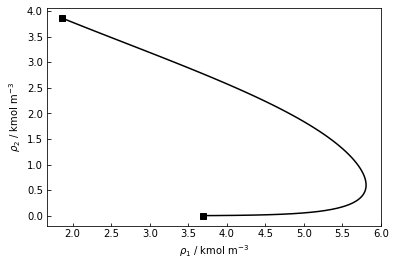

In [8]:
rho = sol.rho / 1000 #density path in kmol/m3
plt.plot(rho[0], rho[1], color = 'k')
plt.plot([rhov[0]/1000, rhol[0]/1000], [rhov[1]/1000, rhol[1]/1000] , 's', color = 'k')
plt.tick_params(direction = 'in')
plt.xlabel(r'$\rho_1$ / kmol m$^{-3}$')
plt.ylabel(r'$\rho_2$ / kmol m$^{-3}$')